In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [125]:
df = pd.read_csv("~/Downloads/transfusion.data")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [126]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<AxesSubplot:xlabel='whether he/she donated blood in March 2007', ylabel='Time (months)'>

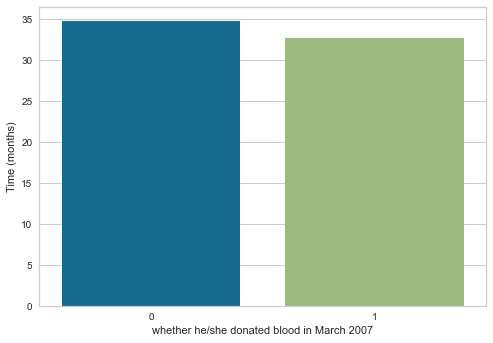

In [127]:
sns.barplot(x=df["whether he/she donated blood in March 2007"], y=df["Time (months)"], ci = None)

<AxesSubplot:xlabel='whether he/she donated blood in March 2007', ylabel='Monetary (c.c. blood)'>

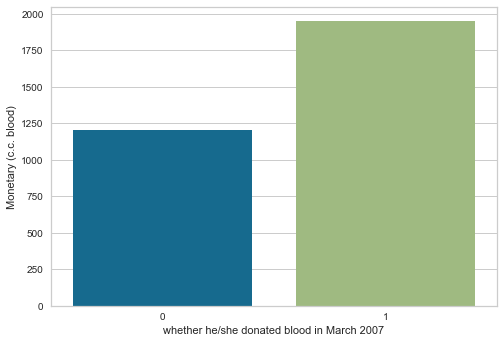

In [128]:
sns.barplot(x=df["whether he/she donated blood in March 2007"], y=df["Monetary (c.c. blood)"], ci = None)

<AxesSubplot:xlabel='whether he/she donated blood in March 2007', ylabel='Frequency (times)'>

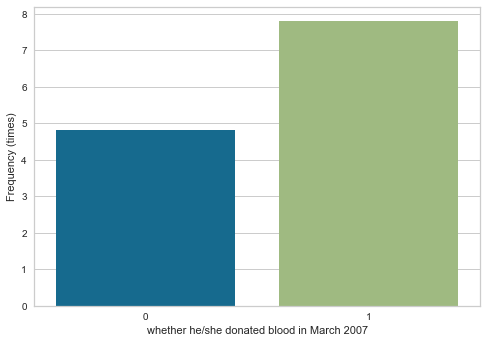

In [129]:
sns.barplot(x=df["whether he/she donated blood in March 2007"], y=df["Frequency (times)"], ci = None)

<AxesSubplot:xlabel='whether he/she donated blood in March 2007', ylabel='Recency (months)'>

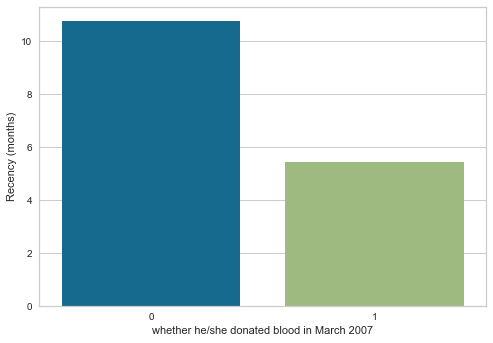

In [130]:
sns.barplot(x=df["whether he/she donated blood in March 2007"], y=df["Recency (months)"], ci = None)

<AxesSubplot:>

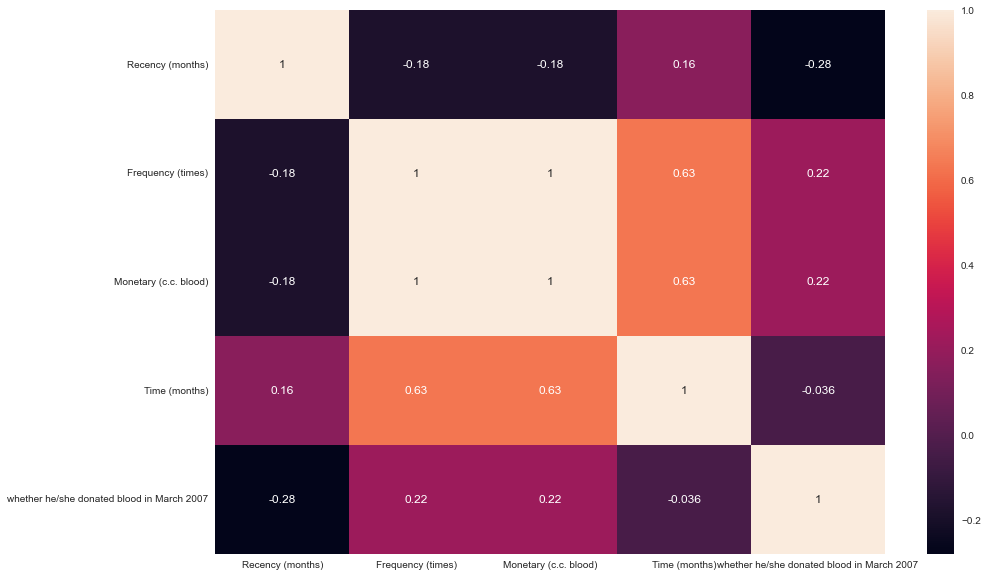

In [134]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [135]:
y = df["whether he/she donated blood in March 2007"]
X= df.drop(columns = {"whether he/she donated blood in March 2007"})
y.value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [136]:
sample = SMOTE(random_state = 45)
X,y = sample.fit_resample(X, y)
y.value_counts()

1    570
0    570
Name: whether he/she donated blood in March 2007, dtype: int64

In [137]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, random_state = 45, train_size = 0.80, test_size = 0.20)

In [138]:
std_scale = MinMaxScaler()
X_train_norm = pd.DataFrame(std_scale.fit_transform(X_train_))

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_train_norm, y_train_, random_state = 45, train_size = 0.80, test_size=0.20)

In [140]:
pca = PCA(n_components= 4)
model = pca.fit(X_train)
PCA(n_components= 4)
print(model.explained_variance_ratio_)  

[7.59021189e-01 1.77714085e-01 6.32411229e-02 2.36032869e-05]


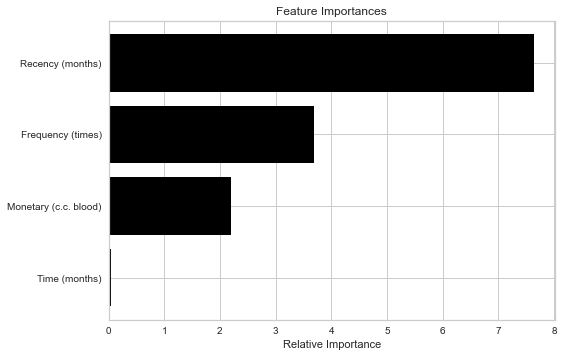

In [141]:
features = df.columns
importances = model.singular_values_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 1.0, 'Elbow curve')

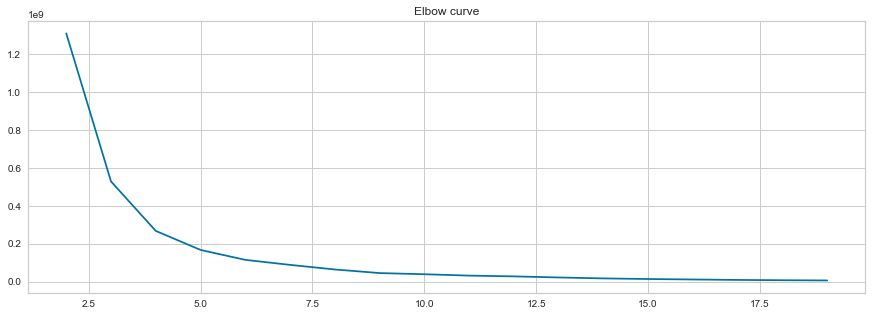

In [142]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

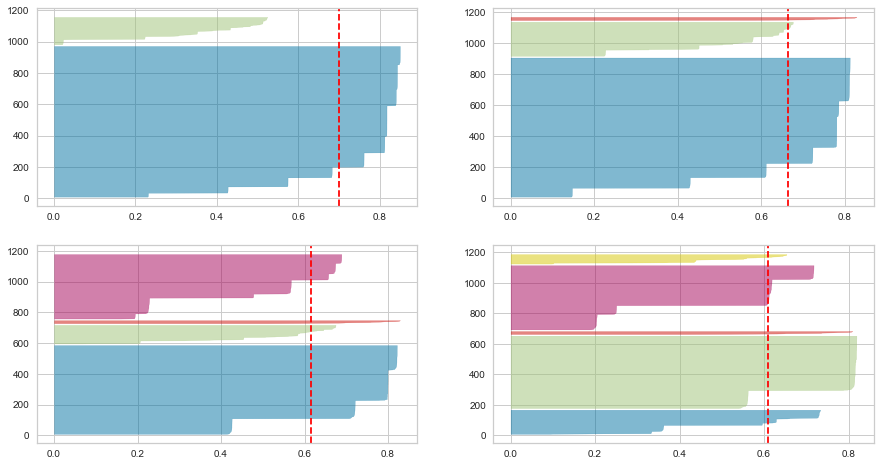

In [143]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=45)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [145]:
model = KNeighborsClassifier(n_neighbors = 3)
mod = model.fit(X_train, y_train)

In [146]:
mode = mod.score(X_train, y_train)
mode

0.7983539094650206

In [147]:
y_predict = mod.predict(X_test)

In [148]:
confusion_matrix(y_test, y_predict)

array([[75, 20],
       [20, 68]])

In [149]:
cv = RepeatedKFold(n_splits = 10, n_repeats =4, random_state =45)

In [150]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        95
           1       0.77      0.77      0.77        88

    accuracy                           0.78       183
   macro avg       0.78      0.78      0.78       183
weighted avg       0.78      0.78      0.78       183



In [151]:
score = cross_val_score(mod, X_test, y_test, scoring = "accuracy", cv = cv, n_jobs = 1, error_score = "raise")
np.mean(score) 

0.7221491228070176